# ***Can rates be predicted by sentimental analysis ?***

We compared 3 different groups of variables and different predicitve models : linear regression, Random Forest, XG Boost and Deep Neural Network.

The variables we used to predict is :
*  Without sentimental scores (Inflation Rate and Euro GDP only)
*  With sentimental scores (Composite score) and Inflation Rate
*  Only sentimental scores (negative, positive and neutral)






In [ ]:
import pandas as pd
import pandas_datareader as pdr
from datetime import datetime
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, KFold
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('/content/merged_ECB_data_daily.csv')

#**Linear Regression**


A linear regression model is a statistical method that help us model the relationship between  a dependent variable and independent variables using a linear equation, its results can help us see if there exists a relationship between these variables to explain fluctuations of the dependent variable, in the following code we make predictions, and evaluate results using the MSE and R squared, results can be compared as well in the scatter plots. **Limits of this model :** the assumption of linearity, as well as multicollinearity and this model could be inneficient with non linear relationships.


To minimise errors and obtain a concise and effective measure of the overall sentiment of each speech, we create a composite score. This composite score can be calculated by subtracting the negative score from the positive score. This method simplifies the analysis by reducing three measures (positive, neutral, negative) to one, while retaining the essence of the sentimental information.
Here is the formula for the composite score:
**Composite Score=Positive Score-Negative ScoreComposite Score=Positive Score-Negative Score.**
This formula takes into account both the positive and negative aspects of sentiment, and subtracting the negative score from the positive score gives an overall measure that reflects the predominant sentiment of the speech. A high positive score would indicate an overall positive sentiment, while a high negative score would indicate an overall negative sentiment.

MSE: 0.17214034410795084
R²: -0.08208811562406537


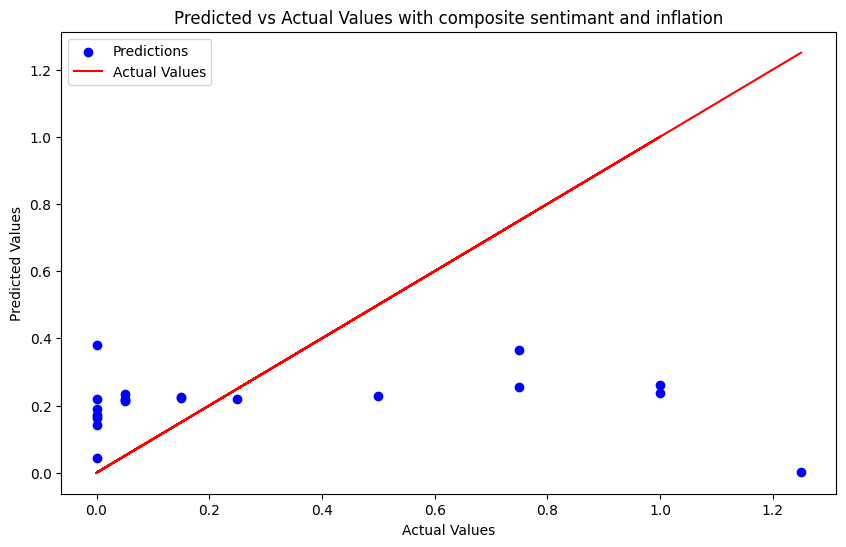

In [ ]:
# Defining composite score & selecting independent variables for the model
df['composite_sentiment_score'] = df['positive_score'] - df['negative_score']
X = df[['composite_sentiment_score', 'Inflation_Rate']]
y = df['Value']

# Splitting the dataset into training and testing sets, training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Building the linear regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Making predictions on the test set
y_pred_linear = linear_model.predict(X_test)

# Evaluating the model with MSE & R2
mse = mean_squared_error(y_test, y_pred_linear)
r2 = r2_score(y_test, y_pred_linear)

print("MSE:", mse)
print("R²:", r2)

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_linear, color='blue', label='Predictions')
plt.plot(y_test, y_test, color='red', label='Actual Values')
plt.title('Predicted vs Actual Values with composite sentimant and inflation')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

MSE: 0.16989263583762643
R²: -0.06795883977468797


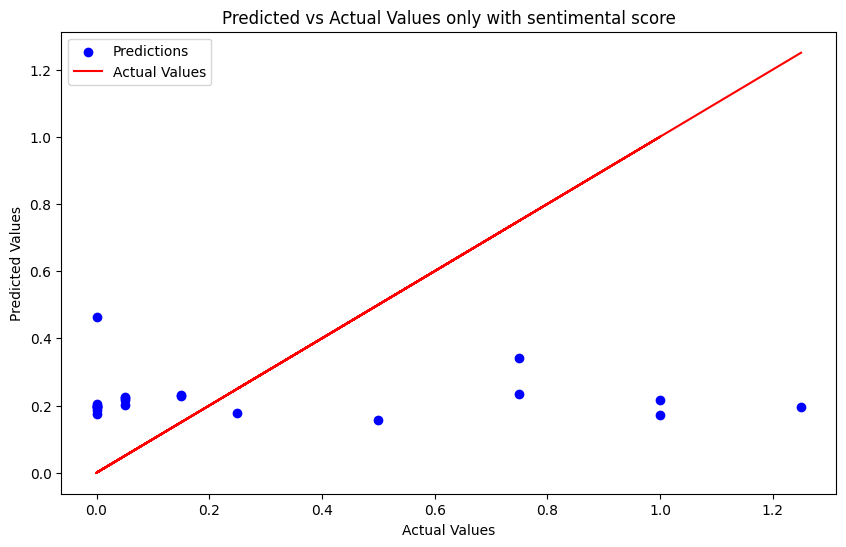

In [ ]:
# Selecting now only the sentiment scores
X2 = df[['negative_score', 'neutral_score', 'positive_score']]
y2 = df['Value']
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)
linear_model2 = LinearRegression()
linear_model2.fit(X2_train, y2_train)
y2_pred_linear = linear_model2.predict(X2_test)
mse2 = mean_squared_error(y2_test, y2_pred_linear)
r22 = r2_score(y2_test, y2_pred_linear)

print("MSE:", mse2)
print("R²:", r22)

plt.figure(figsize=(10, 6))
plt.scatter(y2_test, y2_pred_linear, color='blue', label='Predictions')
plt.plot(y2_test, y2_test, color='red', label='Actual Values')
plt.title('Predicted vs Actual Values only with sentimental score')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()


                                       ecb_statement  negative_score  \
0  Ladies and gentlemen, the Vice-President and I...        0.000452   
1  Ladies and gentlemen, the Vice-President and I...        0.004795   
2  Ladies and gentlemen, the Vice-President and I...        0.000317   
3  Ladies and gentlemen, the Vice-President and I...        0.000978   
4  Ladies and gentlemen, the Vice-President and I...        0.000511   

   neutral_score  positive_score  \
0       0.000320        0.999228   
1       0.011297        0.983908   
2       0.000276        0.999407   
3       0.000828        0.998194   
4       0.001602        0.997888   

                                     sentiment_score       Date  \
0  {'positive_score': 0.99922776222229, 'neutral_... 2012-01-12   
1  {'positive_score': 0.9839080572128296, 'neutra... 2012-02-09   
2  {'positive_score': 0.9994070529937744, 'neutra... 2012-03-08   
3  {'positive_score': 0.9981935620307922, 'neutra... 2012-04-04   
4  {'positive_s

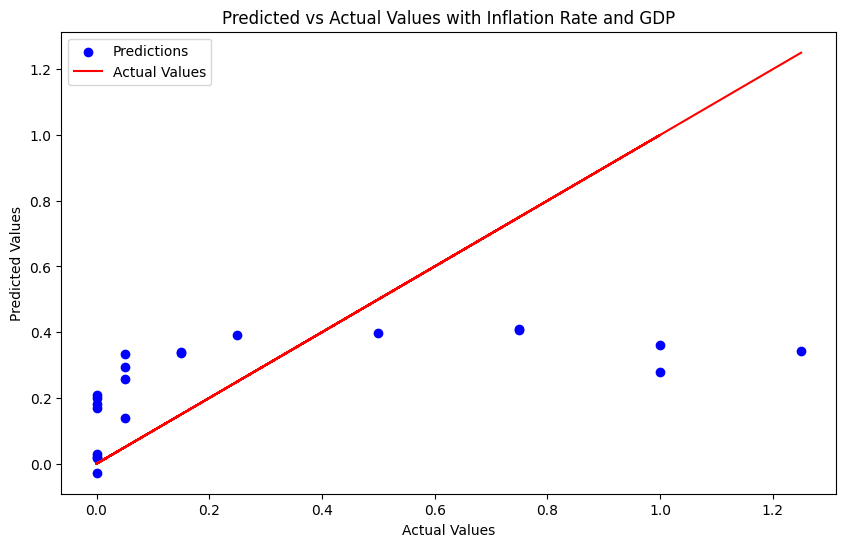

In [ ]:
start = datetime(2012, 1, 1)
end = datetime(2023, 1, 1)

# FRED code for Euro Area GDP
fred_code = 'CLVMEURSCAB1GQEA19'
gdp_data = pdr.get_data_fred(fred_code, start, end)
gdp_daily = gdp_data.resample('D').ffill()
gdp_daily_reset = gdp_daily.reset_index()
gdp_daily_reset.rename(columns={'DATE': 'Date'}, inplace=True)
gdp_daily_reset['Date'] = pd.to_datetime(gdp_daily_reset['Date'])
df['Date'] = pd.to_datetime(df['Date'])
df3 = pd.merge(df, gdp_daily_reset, how='inner', on='Date')
print(df3.head())


X3 = df3[['Inflation_Rate', 'CLVMEURSCAB1GQEA19']]
y3 = df3['Value']

X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.2, random_state=42)

linear_model3 = LinearRegression()
linear_model3.fit(X3_train, y3_train)

y3_pred_linear = linear_model3.predict(X3_test)

mse3 = mean_squared_error(y3_test, y3_pred_linear)
r23 = r2_score(y3_test, y3_pred_linear)

print("MSE:", mse3)
print("R²:", r23)

plt.figure(figsize=(10, 6))
plt.scatter(y3_test, y3_pred_linear, color='blue', label='Predictions')
plt.plot(y3_test, y3_test, color='red', label='Actual Values')
plt.title('Predicted vs Actual Values with Inflation Rate and GDP')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()



#**Random Forest**

We use the random forest model in this part, it is a method that uses multiple decision trees to make a mean predictions, this is useful in capture complex relationships with the data that we are using, this model is also useful in capturing the effects of both categorical and numerical data, in the code below, we train the model with the dataset, and predictions are made on three test set, as before, we use MSE and R2 to evaluate performance. **Limits :** despite the ability of this model to work with complex datasets, we might encounter with the problem, of overfitting, and lack of interpretability.

Random Forest MSE: 0.031098583333333346
Random Forest R²: 0.8045117917468462


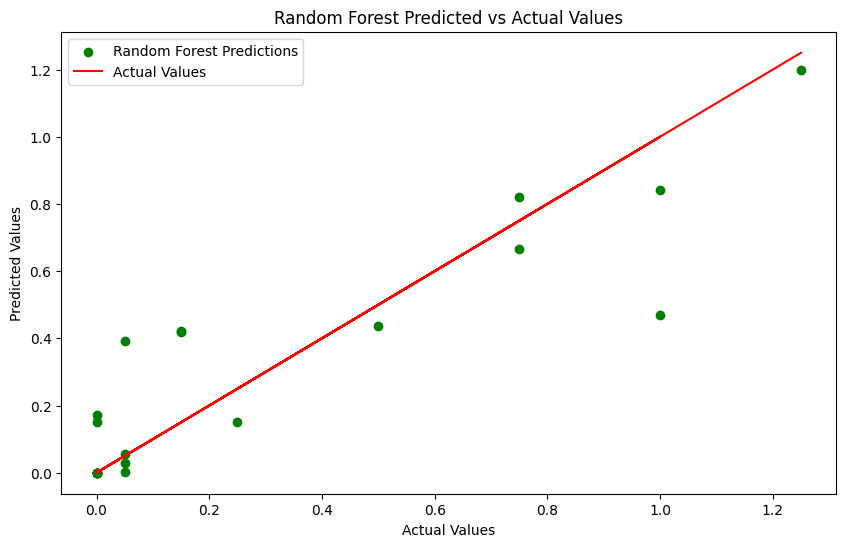

In [ ]:
random_forest_model = RandomForestRegressor(random_state=42)
random_forest_model.fit(X_train, y_train)

y_pred_rf = random_forest_model.predict(X_test)

# Evaluating the model with MSE & R2
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest MSE:", mse_rf)
print("Random Forest R²:", r2_rf)

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, color='green', label='Random Forest Predictions')
plt.plot(y_test, y_test, color='red', label='Actual Values')
plt.title('Random Forest Predicted vs Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

Random Forest MSE: 0.18886386904761904
Random Forest R²: -0.18721354500748322


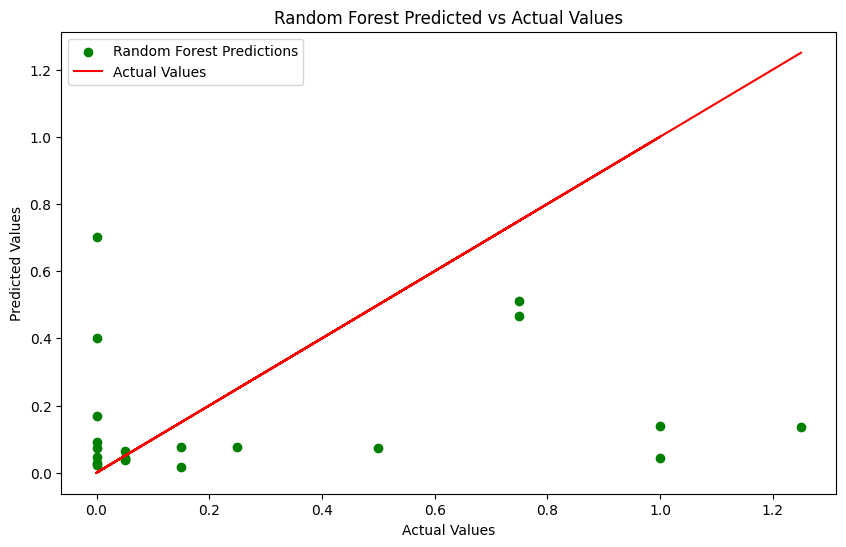

In [ ]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)
random_forest_model2 = RandomForestRegressor(random_state=42)
random_forest_model2.fit(X2_train, y2_train)

y2_pred_rf = random_forest_model2.predict(X2_test)

mse2_rf = mean_squared_error(y2_test, y2_pred_rf)
r22_rf = r2_score(y2_test, y2_pred_rf)

print("Random Forest MSE:", mse2_rf)
print("Random Forest R²:", r22_rf)

plt.figure(figsize=(10, 6))
plt.scatter(y2_test, y2_pred_rf, color='green', label='Random Forest Predictions')
plt.plot(y2_test, y2_test, color='red', label='Actual Values')
plt.title('Random Forest Predicted vs Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

Random Forest MSE: 0.0043172976190476225
Random Forest R²: 0.9728611182381869


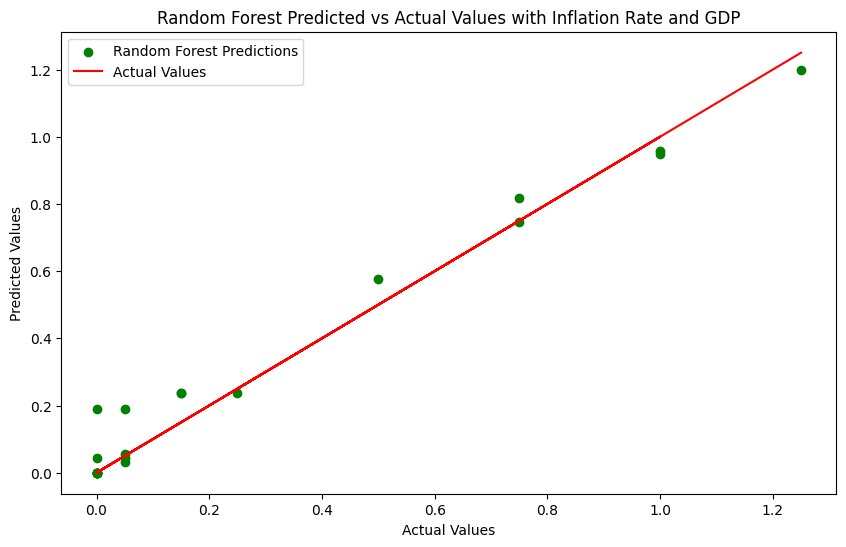

In [ ]:
X3 = df3[['Inflation_Rate', 'CLVMEURSCAB1GQEA19']]
y3 = df3['Value']

X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.2, random_state=42)

random_forest_model3 = RandomForestRegressor(random_state=42)
random_forest_model3.fit(X3_train, y3_train)

y3_pred_rf = random_forest_model3.predict(X3_test)

mse3_rf = mean_squared_error(y3_test, y3_pred_rf)
r23_rf = r2_score(y3_test, y3_pred_rf)

print("Random Forest MSE:", mse3_rf)
print("Random Forest R²:", r23_rf)

plt.figure(figsize=(10, 6))
plt.scatter(y3_test, y3_pred_rf, color='green', label='Random Forest Predictions')
plt.plot(y3_test, y3_test, color='red', label='Actual Values')
plt.title('Random Forest Predicted vs Actual Values with Inflation Rate and GDP')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

#**XG Boost**

In this part of our analysis, we utilize the XGBoost model, an advanced form of gradient boosting known for its efficiency and effectiveness in dealing with structured data. XGBoost stands for eXtreme Gradient Boosting, and it operates by building and sequentially improving a series of decision trees. This model is really good in reducing both bias and variance in the model, making it accurate and robust for a variety of datasets. To measure the models performance we use the MSE and the R2, the results are visualized through scatter plots, helping us do comparison between the model’s predictions and the actual data. **Limits**: One of the main challenges we face is the risk of overfitting, and as before we might encounter the problem of no interpretability.

XGBoost MSE: 0.03501520339931595
XGBoost R²: 0.7798916014667759


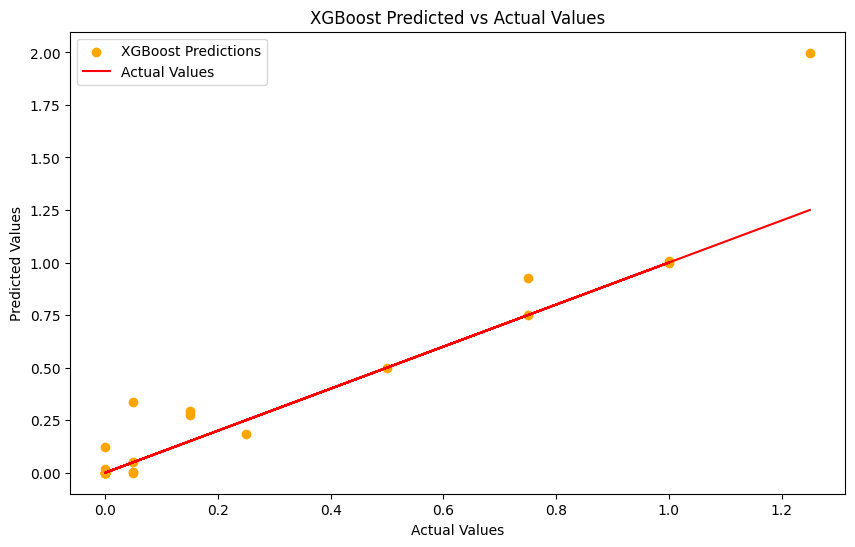

In [ ]:
xgb_model = XGBRegressor(random_state=42)
xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)

# Evaluating the model with MSE & R2
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print("XGBoost MSE:", mse_xgb)
print("XGBoost R²:", r2_xgb)

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_xgb, color='orange', label='XGBoost Predictions')
plt.plot(y_test, y_test, color='red', label='Actual Values')
plt.title('XGBoost Predicted vs Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

Fitting 3 folds for each of 243 candidates, totalling 729 fits
Best parameters are :  {'colsample_bytree': 1.0, 'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}
Best XGBoost MSE:  0.029624355094160525
Best XGBoost R²:  0.8137789096069448


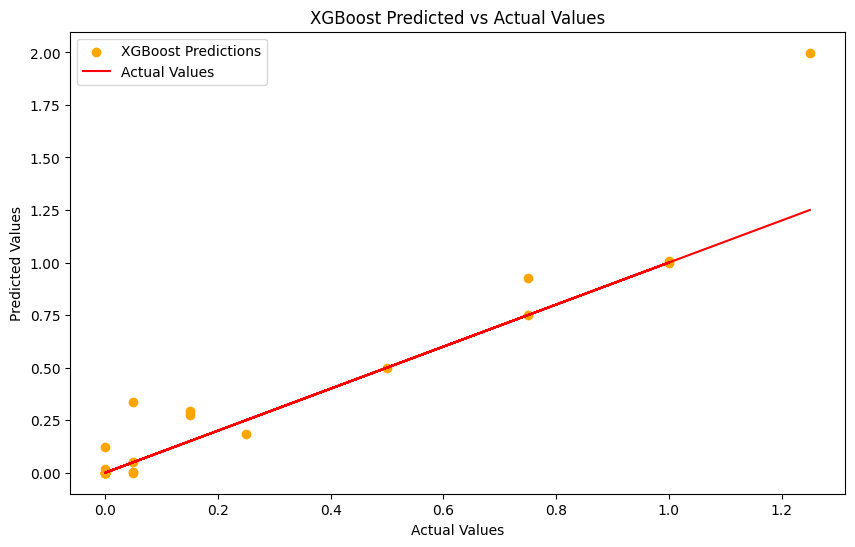

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [3, 4, 5],
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

xgb_reg = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# Search by Grid but we could also use Random Search
grid_search = GridSearchCV(estimator=xgb_reg, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

print("Best parameters are : ", grid_search.best_params_)

best_xgb_model = grid_search.best_estimator_
best_xgb_model.fit(X_train, y_train)

# Evaluate the model
y_pred_best_xgb = best_xgb_model.predict(X_test)
mse_best_xgb = mean_squared_error(y_test, y_pred_best_xgb)
r2_best_xgb = r2_score(y_test, y_pred_best_xgb)

print("Best XGBoost MSE: ", mse_best_xgb)
print("Best XGBoost R²: ", r2_best_xgb)

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_xgb, color='orange', label='XGBoost Predictions')
plt.plot(y_test, y_test, color='red', label='Actual Values')
plt.title('XGBoost Predicted vs Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()


Fitting 3 folds for each of 243 candidates, totalling 729 fits
Best parameters are :  {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 50, 'subsample': 1.0}
Best XGBoost MSE:  0.19468338796707527
Best XGBoost R²:  -0.2237955112747514


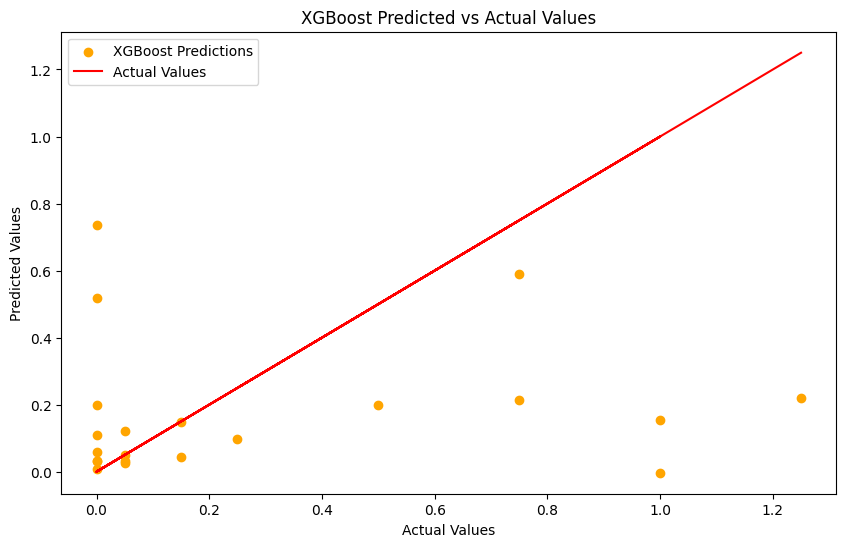

In [ ]:
# Define the parameter grid for Grid Search
param_grid = {
    'max_depth': [3, 4, 5],
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

# Initialize XGBoost regressor
xgb_reg2 = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# Perform Grid Search (could also use Random Search)
grid_search2 = GridSearchCV(estimator=xgb_reg2, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')
grid_search2.fit(X2_train, y2_train)

print("Best parameters are : ", grid_search2.best_params_)

# Get the best estimator from grid search
best_xgb_model2 = grid_search2.best_estimator_
best_xgb_model2.fit(X2_train, y2_train)

# Evaluate the model
y2_pred_best_xgb = best_xgb_model2.predict(X2_test)
mse2_best_xgb = mean_squared_error(y2_test, y2_pred_best_xgb)
r22_best_xgb = r2_score(y2_test, y2_pred_best_xgb)

print("Best XGBoost MSE: ", mse2_best_xgb)
print("Best XGBoost R²: ", r22_best_xgb)

# Plotting XGBoost Predicted vs Actual Values
plt.figure(figsize=(10, 6))
plt.scatter(y2_test, y2_pred_best_xgb, color='orange', label='XGBoost Predictions')
plt.plot(y2_test, y2_test, color='red', label='Actual Values')
plt.title('XGBoost Predicted vs Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()


Fitting 3 folds for each of 243 candidates, totalling 729 fits
Best parameters are :  {'colsample_bytree': 1.0, 'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 200, 'subsample': 1.0}
Best XGBoost MSE:  0.02726371052254078
Best XGBoost R²:  0.8286181121738938


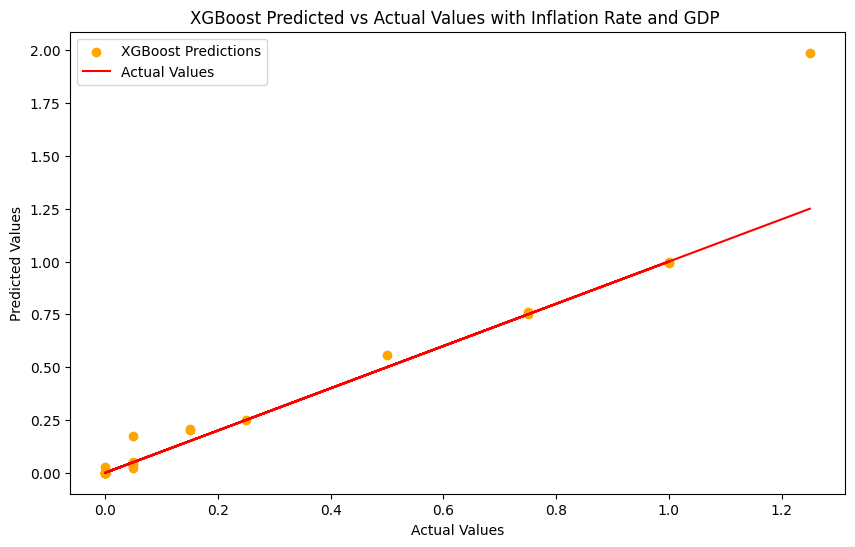

In [ ]:
# Defining the parameter grid for Grid Search
param_grid = {
    'max_depth': [3, 4, 5],
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

# Initializing the XGBoost regressor
xgb_reg3 = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# Performing Grid Search
grid_search3 = GridSearchCV(estimator=xgb_reg3, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')
grid_search3.fit(X3_train, y3_train)

# Displaying the best parameters
print("Best parameters are : ", grid_search3.best_params_)

# Getting the best estimator from the grid search
best_xgb_model3 = grid_search3.best_estimator_
best_xgb_model3.fit(X3_train, y3_train)

# Evaluating the model
y3_pred_best_xgb = best_xgb_model3.predict(X3_test)
mse3_best_xgb = mean_squared_error(y3_test, y3_pred_best_xgb)
r23_best_xgb = r2_score(y3_test, y3_pred_best_xgb)

print("Best XGBoost MSE: ", mse3_best_xgb)
print("Best XGBoost R²: ", r23_best_xgb)

plt.figure(figsize=(10, 6))
plt.scatter(y3_test, y3_pred_best_xgb, color='orange', label='XGBoost Predictions')
plt.plot(y3_test, y3_test, color='red', label='Actual Values')
plt.title('XGBoost Predicted vs Actual Values with Inflation Rate and GDP ')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()


#**Deep Neural Network**

In this section of our analysis, we focus on employing a Deep Neural Network (DNN) model. DNNs represent a class of machine learning algorithms that mimic the structure and function of the human brain using multiple layers of interconnected nodes, or neurons. Our implementation of the DNN model begins with the construction of a Sequential model using TensorFlow and Keras. **Limits**: One of the main challenges we face is the risk of overfitting, and as before we might encounter the problem of no interpretability.

Epoch 1/100
7/7 [==============================] - 3s 189ms/step - loss: 0.1398 - val_loss: 0.0813
Epoch 2/100
7/7 [==============================] - 0s 10ms/step - loss: 0.1046 - val_loss: 0.0589
Epoch 3/100
7/7 [==============================] - 0s 8ms/step - loss: 0.0861 - val_loss: 0.0631
Epoch 4/100
7/7 [==============================] - 0s 8ms/step - loss: 0.0753 - val_loss: 0.0548
Epoch 5/100
7/7 [==============================] - 0s 11ms/step - loss: 0.0713 - val_loss: 0.0457
Epoch 6/100
7/7 [==============================] - 0s 9ms/step - loss: 0.0661 - val_loss: 0.0439
Epoch 7/100
7/7 [==============================] - 0s 11ms/step - loss: 0.0657 - val_loss: 0.0389
Epoch 8/100
7/7 [==============================] - 0s 11ms/step - loss: 0.0636 - val_loss: 0.0410
Epoch 9/100
7/7 [==============================] - 0s 8ms/step - loss: 0.0657 - val_loss: 0.0332
Epoch 10/100
7/7 [==============================] - 0s 10ms/step - loss: 0.0597 - val_loss: 0.0341
Epoch 11/100
7/7 [====

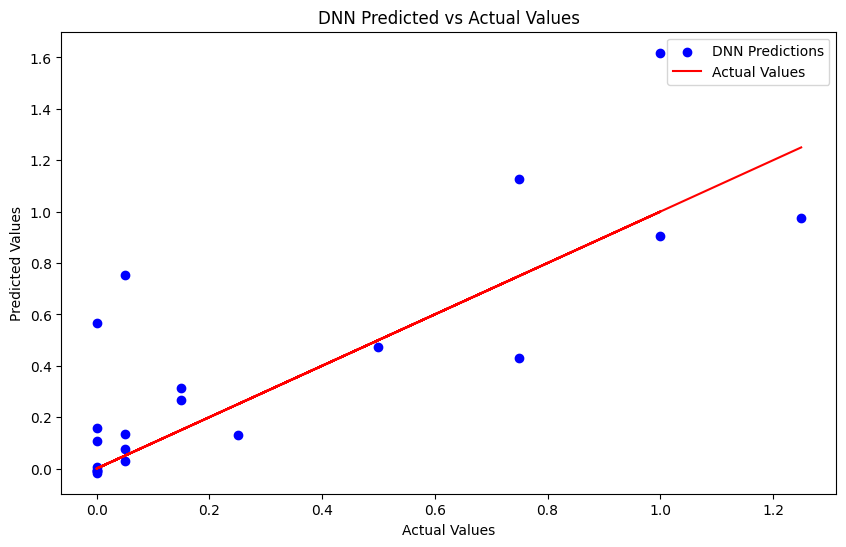

In [ ]:
# Now, we will normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Build the DNN model
model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))  # First hidden layer
model.add(Dense(64, activation='relu'))                                # Second hidden layer
model.add(Dense(1, activation='linear'))                               # Output layer

model.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=0.001))
model.fit(X_train, y_train, epochs=100, batch_size=10, verbose=1, validation_split=0.2)

# Evaluate the model
loss = model.evaluate(X_test, y_test, verbose=0)
print("Test Loss:", loss)

# Predict on the test set with the DNN model
y_pred_dnn = model.predict(X_test).flatten()

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_dnn, color='blue', label='DNN Predictions')
plt.plot(y_test, y_test, color='red', label='Actual Values')
plt.title('DNN Predicted vs Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

Epoch 1/100
7/7 [==============================] - 1s 37ms/step - loss: 0.3157 - val_loss: 0.1593
Epoch 2/100
7/7 [==============================] - 0s 11ms/step - loss: 0.1677 - val_loss: 0.1448
Epoch 3/100
7/7 [==============================] - 0s 11ms/step - loss: 0.1487 - val_loss: 0.1315
Epoch 4/100
7/7 [==============================] - 0s 11ms/step - loss: 0.1473 - val_loss: 0.1299
Epoch 5/100
7/7 [==============================] - 0s 10ms/step - loss: 0.1474 - val_loss: 0.1328
Epoch 6/100
7/7 [==============================] - 0s 8ms/step - loss: 0.1389 - val_loss: 0.1303
Epoch 7/100
7/7 [==============================] - 0s 10ms/step - loss: 0.1425 - val_loss: 0.1318
Epoch 8/100
7/7 [==============================] - 0s 23ms/step - loss: 0.1366 - val_loss: 0.1329
Epoch 9/100
7/7 [==============================] - 0s 18ms/step - loss: 0.1376 - val_loss: 0.1358
Epoch 10/100
7/7 [==============================] - 0s 31ms/step - loss: 0.1381 - val_loss: 0.1338
Epoch 11/100
7/7 [==

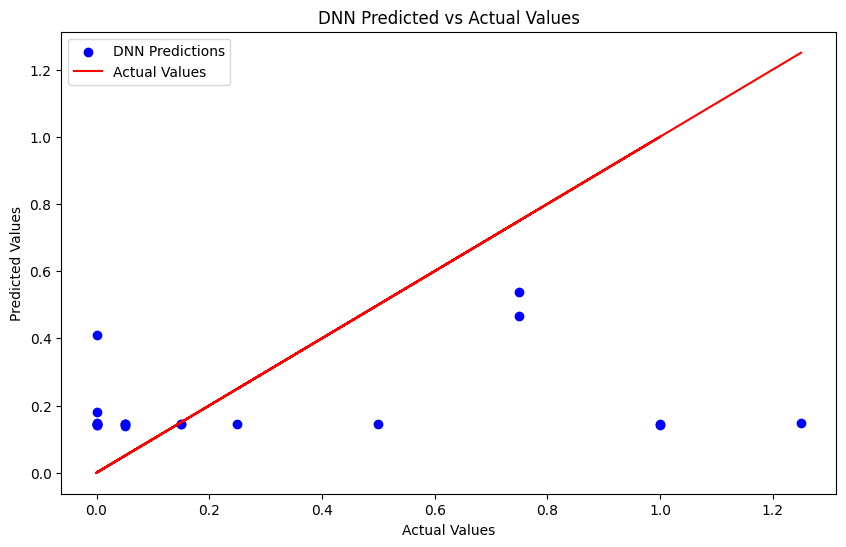

In [ ]:
# Selecting only negative_score, neutral_score, and positive_score as independent variables
X2 = df[['negative_score', 'neutral_score', 'positive_score']]
y2 = df['Value']

# Normalize the features
scaler2 = StandardScaler()
X2_scaled = scaler2.fit_transform(X2)

# Splitting the dataset into training and testing sets
X2_train, X2_test, y2_train, y2_test = train_test_split(X2_scaled, y2, test_size=0.2, random_state=42)

# Build the DNN model
model2 = Sequential()
model2.add(Dense(128, input_dim=X2_train.shape[1], activation='relu'))  # First hidden layer
model2.add(Dense(64, activation='relu'))                                # Second hidden layer
model2.add(Dense(1, activation='linear'))                               # Output layer

# Compile the model
model2.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=0.001))

# Train the model
model2.fit(X2_train, y2_train, epochs=100, batch_size=10, verbose=1, validation_split=0.2)

# Evaluate the model
loss2 = model2.evaluate(X2_test, y2_test, verbose=0)
print("Test Loss:", loss2)

# Predict on the test set with the DNN model
y2_pred_dnn = model2.predict(X2_test).flatten()

# Plotting DNN Predicted vs Actual Values
plt.figure(figsize=(10, 6))
plt.scatter(y2_test, y2_pred_dnn, color='blue', label='DNN Predictions')
plt.plot(y2_test, y2_test, color='red', label='Actual Values')  # Reference line
plt.title('DNN Predicted vs Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

Epoch 1/100
7/7 [==============================] - 2s 53ms/step - loss: 0.1418 - val_loss: 0.0481
Epoch 2/100
7/7 [==============================] - 0s 21ms/step - loss: 0.0835 - val_loss: 0.0497
Epoch 3/100
7/7 [==============================] - 0s 15ms/step - loss: 0.0919 - val_loss: 0.0504
Epoch 4/100
7/7 [==============================] - 0s 43ms/step - loss: 0.0792 - val_loss: 0.0467
Epoch 5/100
7/7 [==============================] - 0s 44ms/step - loss: 0.0707 - val_loss: 0.0404
Epoch 6/100
7/7 [==============================] - 0s 23ms/step - loss: 0.0674 - val_loss: 0.0355
Epoch 7/100
7/7 [==============================] - 0s 9ms/step - loss: 0.0670 - val_loss: 0.0296
Epoch 8/100
7/7 [==============================] - 0s 9ms/step - loss: 0.0645 - val_loss: 0.0274
Epoch 9/100
7/7 [==============================] - 0s 8ms/step - loss: 0.0590 - val_loss: 0.0352
Epoch 10/100
7/7 [==============================] - 0s 11ms/step - loss: 0.0658 - val_loss: 0.0433
Epoch 11/100
7/7 [====

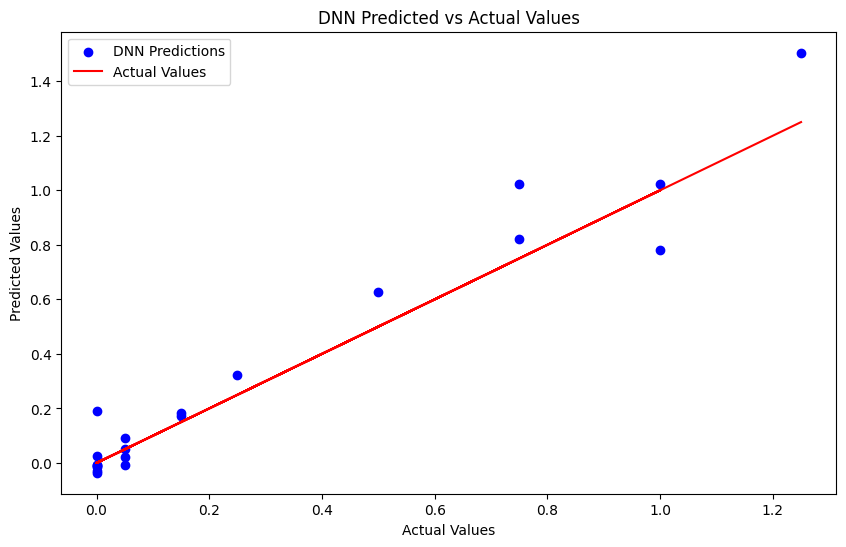

In [ ]:
# Normalize the features
scaler3 = StandardScaler()
X3_scaled = scaler3.fit_transform(X3)

# Splitting the dataset into training and testing sets
X3_train, X3_test, y3_train, y3_test = train_test_split(X3_scaled, y3, test_size=0.2, random_state=42)

# Build the DNN model
model3 = Sequential()
model3.add(Dense(128, input_dim=X3_train.shape[1], activation='relu'))  # First hidden layer
model3.add(Dense(64, activation='relu'))                                # Second hidden layer
model3.add(Dense(1, activation='linear'))                               # Output layer

# Compile the model
model3.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=0.001))

# Train the model
model3.fit(X3_train, y3_train, epochs=100, batch_size=10, verbose=1, validation_split=0.2)

# Evaluate the model
loss3 = model3.evaluate(X3_test, y3_test, verbose=0)
print("Test Loss:", loss3)

# Predict on the test set with the DNN model
y3_pred_dnn = model3.predict(X3_test).flatten()

# Plotting DNN Predicted vs Actual Values
plt.figure(figsize=(10, 6))
plt.scatter(y3_test, y3_pred_dnn, color='blue', label='DNN Predictions')
plt.plot(y3_test, y3_test, color='red', label='Actual Values')  # Reference line
plt.title('DNN Predicted vs Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()
